In [1]:
# 📌 Step 1: Install required libraries (run this once)
#!pip install mlxtend pandas matplotlib seaborn openpyxl

In [15]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Step 1: Load and prepare the dataset
df = pd.read_excel("Online retail.xlsx")  # replace with your actual filename
df.columns = ['items']

In [17]:
# Step 2: Split each transaction's items
transactions = df['items'].apply(lambda x: x.split(','))



In [18]:
# Step 3: One-hot encode the transaction list
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
basket = pd.DataFrame(te_ary, columns=te.columns_)



In [19]:
# Step 4: Apply Apriori with multiple thresholds
support_vals = [0.005, 0.01, 0.02]
confidence_vals = [0.2, 0.3, 0.5]

results = []

for s in support_vals:
    frequent_itemsets = apriori(basket, min_support=s, use_colnames=True)
    for c in confidence_vals:
        rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=c)
        rules = rules[rules['lift'] > 1]
        results.append({
            'Support': s,
            'Confidence': c,
            'Num_Rules': len(rules)
        })

summary_df = pd.DataFrame(results)
print(summary_df)



   Support  Confidence  Num_Rules
0    0.005         0.2        587
1    0.005         0.3        261
2    0.005         0.5         20
3    0.010         0.2        160
4    0.010         0.3         63
5    0.010         0.5          2
6    0.020         0.2         55
7    0.020         0.3         20
8    0.020         0.5          0


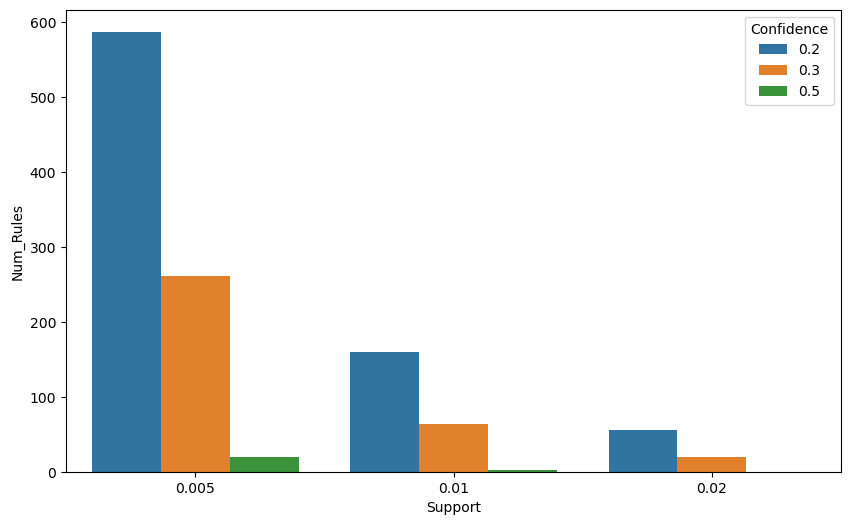

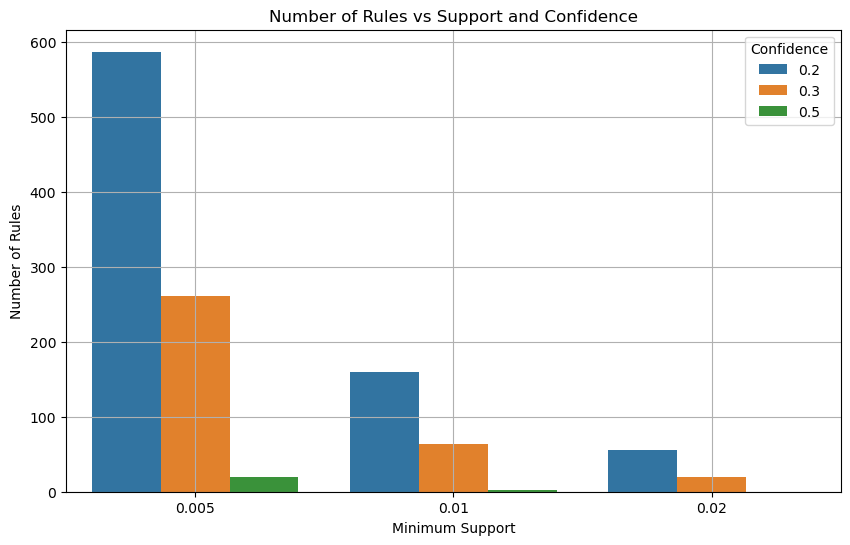

In [20]:
# Step 5: Visualize rule count
plt.figure(figsize=(10, 6))
summary_df['Support'] = summary_df['Support'].astype(str)
summary_df['Confidence'] = summary_df['Confidence'].astype(str)

sns.barplot(data=summary_df, x='Support', y='Num_Rules', hue='Confidence')

# Plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=summary_df, x='Support', y='Num_Rules', hue='Confidence')
plt.title('Number of Rules vs Support and Confidence')
plt.xlabel('Minimum Support')
plt.ylabel('Number of Rules')
plt.grid(True)
plt.show()

In [ ]:
1. What is Lift and why is it important in Association Rules?
Lift measures how much more likely two items are to be bought together compared to if they were statistically independent.
Lift helps us filter out misleading rules. A high-confidence rule may still be common and not useful — lift checks if the rule is actually interesting or better than chance.

2. What is Support and Confidence? How do you calculate them?
Support:
Support indicates how frequently an itemset appears in the dataset.
Used to eliminate rare itemsets and reduce computation by focusing on frequently occurring patterns.
Confidence:
Confidence indicates how often item B appears in transactions that contain A.
Shows the strength of implication — how reliably A leads to B.

3. What are some limitations or challenges of Association Rules Mining?
Too many rules: Can overwhelm users if thresholds are too low.
No causation: Association doesn’t imply one item causes the purchase of another.
Rare item problem: Important but rare items may be filtered out by support.
High computation cost: Generating rules from large datasets is time-consuming.
Threshold tuning: Choosing support, confidence, and lift values is subjective and domain-specific.
Interpretability: As datasets grow, rules become harder to interpret and apply.
